In [1]:
from __future__ import print_function
import numpy as np
# matplotlib for displaying the output
import matplotlib.pyplot as plt
%matplotlib inline
# and IPython.display for audio output
import IPython.display
# Librosa for audio
import librosa
# And the display module for visualization
import librosa.display
# To read raw files
import soundfile as sf

In [2]:
audio_path = "/Users/hyh/Desktop/ODAS/Files/recordings/separated_2019-09-09_14_45_11.raw"

In [3]:
y, sr = sf.read(audio_path, channels = 4, samplerate = 16000, subtype = "PCM_16", endian='LITTLE')

In [ ]:
def spectrogram(data, sr):
    # Obtain the number of channels in the data
    channels = data.shape[1]
    
    for channel in range(0,channels):        
        # Make and display a mel-scaled power (energy-squared) spectrogram
        S = librosa.feature.melspectrogram(data[:,channel], sr=sr, n_mels=1024)
        # Convert to log scale (dB). We'll use the peak power (max) as reference.
        log_S = librosa.power_to_db(S, ref=np.max)

In [ ]:
        # Make a new figure
        plt.figure(figsize=(12,4))
        # Display the spectrogram on a mel scale
        # sample rate and hop length parameters are used to render the time axis
        librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')
        # Put a descriptive title on the plot
        plt.title('Channel ' + str(channel+1) + ' mel power spectrogram')

        # draw a color bar
        plt.colorbar(format='%+02.0f dB')

        # Make the figure layout compact
        plt.tight_layout()

In [8]:
S = librosa.feature.melspectrogram(y[:,0], sr=sr, n_mels=512)
# Convert to log scale (dB). We'll use the peak power (max) as reference.
log_S = librosa.power_to_db(S, ref=np.max)

In [11]:
S.size

4580864

In [10]:
log_S.shape
# Private directory: original raw files
# Save the log file, raw data, and the log spectrogram data
# Public directory: log files, summary of the log files, and a file of 4 channels of spectrogram data
# Save as npz
with (filename, 'wb') as f:
    np.savez(f,channel=x,channe2=y,....)

(512, 8947)

Populating the interactive namespace from numpy and matplotlib


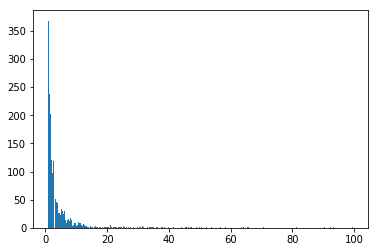

In [23]:
# Convert S into float16 to save space
# S.savez
%pylab inline 
H=S.flatten()
H=np.array(H,dtype=np.float16)
J=H[H>1]
J=J[J<100]
hist(J, bins=1000);

In [19]:
max(H)

1255.9446